# Examine exclusivity of CTNNB1 and TP53 Mutation in Endometrial Cancer

#### Library Imports

In [29]:
import pandas as pd
import numpy as np

import cptac
import cptac.utils as ut

import seaborn as sns
import matplotlib.pyplot as plt

en = cptac.Endometrial()

### Get TP53 Mutations

In [39]:
#Get TP53 Mutations
TP53_mutations = en.join_omics_to_mutations(omics_genes=['TP53'], omics_df_name='proteomics', mutations_genes=['TP53'])[['TP53_Mutation_Status','TP53_Mutation']]

#Remove Wildtype Normal samples
TP53_mutations = TP53_mutations.loc[TP53_mutations['TP53_Mutation_Status'] != 'Wildtype_Normal']

In [40]:
TP53_mutations.head()

Name,TP53_Mutation_Status,TP53_Mutation
Sample_ID,,
S001,Single_mutation,[Missense_Mutation]
S002,Wildtype_Tumor,[Wildtype_Tumor]
S003,Wildtype_Tumor,[Wildtype_Tumor]
S005,Wildtype_Tumor,[Wildtype_Tumor]
S006,Single_mutation,[Missense_Mutation]


### Get CTNNB Mutations

In [41]:
#Get CTNNB1 Mutations
CTNNB_mutations = en.join_omics_to_mutations(omics_genes=['CTNNB1'], omics_df_name='proteomics', mutations_genes=['CTNNB1'])[['CTNNB1_Mutation_Status','CTNNB1_Mutation']]

##Remove Wildtype Normal samples
CTNNB_mutations = CTNNB_mutations.loc[CTNNB_mutations['CTNNB1_Mutation_Status'] != 'Wildtype_Normal']

In [42]:
CTNNB_mutations.head()

Name,CTNNB1_Mutation_Status,CTNNB1_Mutation
Sample_ID,,
S001,Wildtype_Tumor,[Wildtype_Tumor]
S002,Wildtype_Tumor,[Wildtype_Tumor]
S003,Wildtype_Tumor,[Wildtype_Tumor]
S005,Wildtype_Tumor,[Wildtype_Tumor]
S006,Wildtype_Tumor,[Wildtype_Tumor]


### Join CTNNB and TP53 Mutation Dataframes, and Reformat

In [45]:
#Concatenate Dataframes
TP53_and_CTNNB_Mutations = pd.concat([CTNNB_mutations, TP53_mutations], axis=1)[['CTNNB1_Mutation_Status','TP53_Mutation_Status']]

#Classify all mutations as 'mutation' and all wildtypes as 'wildtype'
TP53_and_CTNNB_Mutations = TP53_and_CTNNB_Mutations.replace({'Wildtype_Tumor':'Wildtype','Single_mutation':'Mutation','Multiple_mutation':'Mutation'})

TP53_and_CTNNB_Mutations.head()

Name,CTNNB1_Mutation_Status,TP53_Mutation_Status
Sample_ID,,
S001,Wildtype,Mutation
S002,Wildtype,Wildtype
S003,Wildtype,Wildtype
S005,Wildtype,Wildtype
S006,Wildtype,Mutation


### Classify where TP53 and CTNNB are mutated together

In [35]:
for ind, row in TP53_and_CTNNB_Mutations.iterrows():
    if row['TP53_Mutation_Status'] == 'Mutation' and row['CTNNB1_Mutation_Status'] == 'Mutation':
        TP53_and_CTNNB_Mutations.loc[ind, 'Mutation_Exclusivity'] = 'Both'
        
    elif row['TP53_Mutation_Status'] == 'Mutation' and row['CTNNB1_Mutation_Status'] != 'Mutation':
        TP53_and_CTNNB_Mutations.loc[ind, 'Mutation_Exclusivity'] = 'TP53_Only'
        
    elif row['TP53_Mutation_Status'] != 'Mutation' and row['CTNNB1_Mutation_Status'] == 'Mutation':
        TP53_and_CTNNB_Mutations.loc[ind, 'Mutation_Exclusivity'] = 'CTNNB1_Only'
        
    else:
        TP53_and_CTNNB_Mutations.loc[ind, 'Mutation_Exclusivity'] = 'Neither'

In [36]:
#TP53_and_CTNNB_Mutations = TP53_and_CTNNB_Mutations['Mutation_Exclusivity']
TP53_and_CTNNB_Mutations

Name,CTNNB1_Mutation_Status,TP53_Mutation_Status,Mutation_Exclusivity
Sample_ID,,,
S001,Wildtype,Mutation,TP53_Only
S002,Wildtype,Wildtype,Neither
S003,Wildtype,Wildtype,Neither
S005,Wildtype,Wildtype,Neither
S006,Wildtype,Mutation,TP53_Only
S007,Mutation,Wildtype,CTNNB1_Only
S008,Mutation,Mutation,Both
S009,Wildtype,Mutation,TP53_Only
S010,Wildtype,Wildtype,Neither


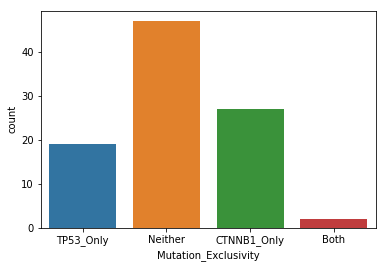

In [37]:
sns.countplot(data=TP53_and_CTNNB_Mutations, x='Mutation_Exclusivity')